<a href="https://colab.research.google.com/github/fvillena/dcc-ia-nlp/blob/master/2-sw-lem-stem-wc-tfidf-svd-sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stopwords, lematización, stemming, wordclouds y TF-IDF

Preparamos el ambiente de desarrollo

In [1]:
import spacy
import nltk
import sklearn
import wordcloud
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!wget https://raw.githubusercontent.com/fvillena/dcc-ia-nlp/master/data/aysen.csv

--2020-11-03 22:34:39--  https://raw.githubusercontent.com/fvillena/dcc-ia-nlp/master/data/aysen.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29482924 (28M) [text/plain]
Saving to: ‘aysen.csv.2’

aysen.csv.2         100%[===================>]  28.12M  37.1MB/s    in 0.8s    

2020-11-03 22:34:40 (37.1 MB/s) - ‘aysen.csv.2’ saved [29482924/29482924]



In [3]:
nltk.download('stopwords')
nltk.download('wordnet') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
!python -m spacy download es_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [5]:
import es_core_news_sm
nlp_es = es_core_news_sm.load()

## Actividad 1: Stopwords

Compare las listas de stopwords asociadas a las 2 bibliotecas utiilizadas y enuncie las diferencias que pueda encontrar entre ellas.

In [6]:
# Así cargamos las listas de stopwords
nltk_stopwords = nltk.corpus.stopwords.words('spanish')
spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS

In [7]:
import random

In [8]:
print(random.sample(nltk_stopwords,10))
print(len(nltk_stopwords))

['estuvieseis', 'habían', 'tuviste', 'habidos', 'tuyo', 'para', 'desde', 'tendrían', 'sois', 'estéis']
313


In [9]:
print(random.sample(spacy_stopwords,10))
print(len(spacy_stopwords))

['una', 'ir', 'estado', 'había', 'dos', 'podria', 'quiénes', 'consiguen', 'dicen', 'segun']
551


In [10]:
stopwords = set(list(nltk_stopwords) + list(spacy_stopwords))
print(random.sample(stopwords,10))
print(len(stopwords))

['atras', 'dar', 'estan', 'muchas', 'arribaabajo', 'los', 'hicieron', 'aquello', 'cualquier', 'estaréis']
704


In [11]:
common_stopwords = []
for word in stopwords:
  if (word in nltk_stopwords) & (word in spacy_stopwords):
    common_stopwords.append(word)
print(random.sample(common_stopwords,10))
print(len(common_stopwords))

['por', 'nuestras', 'hemos', 'este', 'vuestros', 'esa', 'vosotras', 'otro', 'otras', 'quienes']
160


## Actividad 2: Stemming y lematización

Dada una lista de conjuntos de palabras (raw_words) lematice y realice stemming sobre cada palabra y compare los resultados asociados a cada conjunto de palabras.

In [12]:
raw_words = [
             ("fly","flies","flying"),
             ("organize","organizes","organizing"),
             ("universe","university")
]

In [13]:
# Así instanciamos el stemmer y lematizador

stemmer = nltk.stem.SnowballStemmer("english")
lemmatizer = nltk.stem.WordNetLemmatizer()

In [14]:
stemmer.stem("flies")

'fli'

In [15]:
lemmatizer.lemmatize("flies")

'fly'

In [16]:
stemmed_words = []
for word_set in raw_words:
  stemmed_word_set = []
  for word in word_set:
    stemmed_word_set.append(stemmer.stem(word))
  stemmed_words.append(stemmed_word_set)
print(raw_words)
print(stemmed_words)

[('fly', 'flies', 'flying'), ('organize', 'organizes', 'organizing'), ('universe', 'university')]
[['fli', 'fli', 'fli'], ['organ', 'organ', 'organ'], ['univers', 'univers']]


In [17]:
lemmatized_words = []
for word_set in raw_words:
  lemmatized_word_set = []
  for word in word_set:
    lemmatized_word_set.append(lemmatizer.lemmatize(word))
  lemmatized_words.append(lemmatized_word_set)
print(raw_words)
print(lemmatized_words)

[('fly', 'flies', 'flying'), ('organize', 'organizes', 'organizing'), ('universe', 'university')]
[['fly', 'fly', 'flying'], ['organize', 'organizes', 'organizing'], ['universe', 'university']]


# Actividad 3: TF-IDF

Utilizando el corpus newsgroups.data crea una matrix de términos y documentos utilizando tf-idf.

Utiliza la implementación que tiene sklearn de este método. Acá está la documentación.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

Después de generar la matrix, explora los valores de idf de las palabras, ¿Qué conclusión puedes esbozar al observar las palabras con mayor y menor idf?

In [18]:
remove = ('headers', 'footers', 'quotes')
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = sklearn.datasets.fetch_20newsgroups(remove=remove,categories=categories)

In [19]:
print(newsgroups.data[0])

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


In [20]:
tfidf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(stop_words="english",min_df=0.005)
x = tfidf_vectorizer.fit_transform(newsgroups.data)

In [21]:
idf_dict = dict(zip(tfidf_vectorizer.get_feature_names(),tfidf_vectorizer.idf_))
idf_dict = {k: v for k, v in sorted(idf_dict.items(), key=lambda item: item[1])}
print(list(idf_dict.items())[:5])
print(list(idf_dict.items())[-5:])

[('don', 2.533751684801524), ('like', 2.533751684801524), ('just', 2.5544658891890872), ('know', 2.5875658376154322), ('think', 2.6702161086960494)]
[('velocity', 6.133344448088695), ('walls', 6.133344448088695), ('weather', 6.133344448088695), ('wise', 6.133344448088695), ('workstation', 6.133344448088695)]


## Ejemplo: Wordcloud

Una manera sencilla y útil de visualizar un cuerpo de texto es utilizar una nube de palabras. Esta visualización representa las palabras contenidas en un texto y codifica su tamaño en función de una métrica de peso de las palabras (frecuencia bruta o tf-idf), de esta manera palabras "más importantes" se visualizan más grandes.

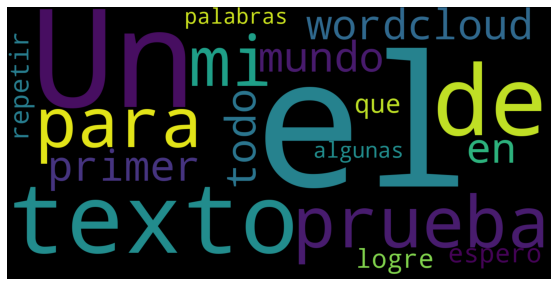

In [22]:
description = "Un texto de prueba para mi primer wordcloud en el todo el mundo, espero que logre repetir algunas palabras"
wc = wordcloud.WordCloud(width=1600, height=800).generate(description)
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

## Actividad 4: Analizando la lista de espera chilena

El conjunto de datos aysen contiene todas las interconsultas que se realizan desde los consultorios hacia los hospitales de la región de aysén, este conjunto de datos contiene sospechas diagnósticas en texto libre. 

Desde el conjunto de datos aysen realice las siguientes tareas:

1.   Construya un wordcloud en donde se visualice la columna SOSPECHA_DIAG de la región.
2.   Proponga algún tipo de filtrado para mejorar la información a comunicar a través de la nube de palabras
3.   Pondere el tamaño de las palabras según otra métrica (hint: ¿tf o idf?)



In [23]:
aysen = pd.read_csv("aysen.csv", sep=';')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
aysen.head()

FECHA_NAC  SEXO  ... COMUNA                                      SOSPECHA_DIAG
0      1985     2  ...  11101                        Celulitis y absceso de boca
1      1946     1  ...  11101                              Periodontitis cronica
2      1937     2  ...  11101  Otras afecciones especificadas de los dientes ...
3      1955     2  ...  11101  Trastornos de disco lumbar y otros, con radicu...
4      1997     2  ...  11101                        Celulitis y absceso de boca

[5 rows x 16 columns]

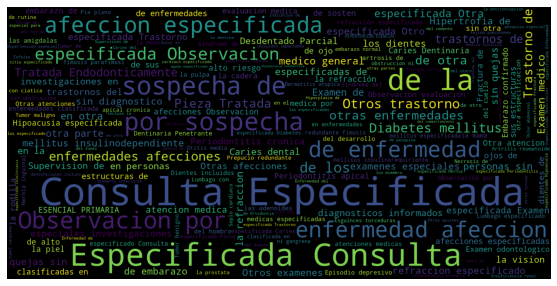

In [25]:
corpus = " ".join(aysen.SOSPECHA_DIAG.to_list())
wc = wordcloud.WordCloud(width=1600, height=800).generate(corpus)
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [26]:
import re
def normalizer(text, remove_tildes = True): #normalizes a given string to lowercase and changes all vowels to their base form
    text = text.lower() #string lowering
    text = re.sub(r'[^A-Za-zñáéíóú]', ' ', text) #replaces every punctuation with a space
    if remove_tildes:
        text = re.sub('á', 'a', text) #replaces special vowels to their base forms
        text = re.sub('é', 'e', text)
        text = re.sub('í', 'i', text)
        text = re.sub('ó', 'o', text)
        text = re.sub('ú', 'u', text)
    return text

In [27]:
stopwords_normalized = map(normalizer,stopwords)
corpus_normalized = normalizer(corpus)
corpus_normalized_no_stopwords = ""
for word in corpus_normalized.split(" "):
  if (len(word) > 3) & (word not in stopwords_normalized):
    corpus_normalized_no_stopwords += word +  " "

In [28]:
corpus_normalized_no_stopwords

'celulitis absceso boca periodontitis cronica otras afecciones especificadas dientes estructuras sosten trastornos disco lumbar otros radiculopatia celulitis absceso boca pitiriasis alba fisura anal periodontitis apical aguda originada pulpa osteomielitis especificada examen pesquisa especial para tumor cuello uterino insuficiencia renal cronica insuficiencia renal cronica periodontitis cronica herida muñeca mano otros trastornos meniscos masa anexial insuficiencia renal cronica insuficiencia renal cronica consulta especificada periodontitis cronica esguinces torceduras otros sitios especificados colelitiasis infarto cerebral dermatitis atopica especificada infertilidad femenina especificada periodontitis apical aguda originada pulpa asma complicacion descripciones definidas enfermedades cardiaca arritmia cardiaca especificada cefalea tensional cefalea tensional catarata especificada astigmatismo trastorno refraccion especificado verrugas venereas anogenitales sindrome bronquial obstru

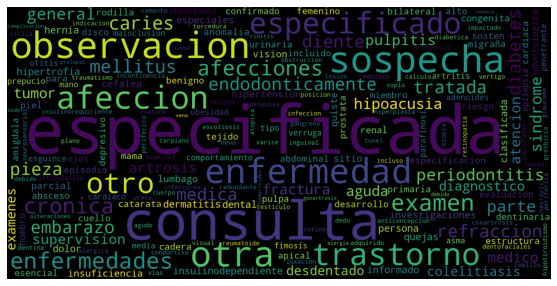

In [29]:
wc = wordcloud.WordCloud(width=1600, height=800,collocations=False).generate(corpus_normalized_no_stopwords)
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [30]:
tfidf_vectorizer_aysen = sklearn.feature_extraction.text.TfidfVectorizer(stop_words="english",min_df=0.0001)
x_aysen = tfidf_vectorizer_aysen.fit_transform(aysen.SOSPECHA_DIAG)
idf_dict_aysen = dict(zip(tfidf_vectorizer_aysen.get_feature_names(),tfidf_vectorizer_aysen.idf_))

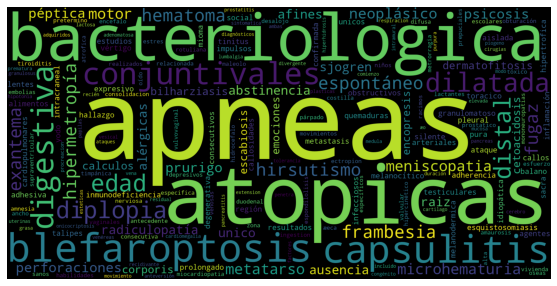

In [31]:
wc = wordcloud.WordCloud(width=1600, height=800).generate_from_frequencies(idf_dict_aysen)
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

## Actividad 5: SVD

Desde la matriz de tf-idf calculada anteriormente sobre newsgroups realice una descomposición mediante SVD.

1.   Verifique que las matrices U y V calculadas con SVD son ortonormales
2.   Verifique hasta que vector los temas identificados en SVD hacen “sentido” para los 4 temas seleccionados.
3.   ¿Cuántos temas potencialmente se pueden inferir con SVD?



In [37]:
## HINT: Estas lineas de código pueden serle útiles para resolver la actividad
import numpy as np
vocab = tfidf_vectorizer.get_feature_names()
def show_topics(a):
  num_top_words=8
  top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
  topic_words = ([top_words(t) for t in a])
  return [' '.join(t) for t in topic_words]
#SVD
U, s, Vh = np.linalg.svd(x.toarray(), full_matrices=False)

In [46]:
product_u = U.dot(U.T)
np.fill_diagonal(product_u,0)
np.allclose(product_u, 0, atol=1e-08, equal_nan=False)

True

In [48]:
product_v = Vh.dot(Vh.T)
np.fill_diagonal(product_v,0)
np.allclose(product_v, 0, atol=1e-08, equal_nan=False)

True

In [58]:
np.allclose(np.sum(np.abs(U)**2,axis=-1)**(1./2), 1, atol=1e-08, equal_nan=False)

True

In [59]:
np.allclose(np.sum(np.abs(Vh)**2,axis=-1)**(1./2), 1, atol=1e-08, equal_nan=False)

True

In [38]:
show_topics(Vh)

['contributed extensive union 85 aeronautics overall concluded 43',
 'god jesus people bible believe christian say religion',
 'thanks graphics files god file image does windows',
 'god space jesus bible edu nasa satan christ',
 'jesus does bible objective christian morality think moral',
 'image graphics file data use images software computer',
 'jesus just koresh thanks graphics don like bible',
 'files file format cview program image know tiff',
 'mode card lunar moon software orbit need time',
 'jesus kent cheers christian religion people islam law',
 'jesus objective morality thanks bible don think people',
 'thanks moon just orbit lunar earth data format',
 'people don religion thanks software kent cheers god',
 'graphics think don space points comp know 3d',
 'thanks space post think color question ve bit',
 'just graphics does objective thanks islam group people',
 'software like did evidence ve koresh space shuttle',
 'kent cheers don objective evidence time jim didn',
 'softw